In [1]:
%reload_kedro

2020-04-10 13:50:13,592 - root - INFO - ** Kedro project Dynamic Topic Modeling
2020-04-10 13:50:13,592 - root - INFO - Defined global variable `context` and `catalog`
Traceback (most recent call last):
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/kedro/cli/cli.py", line 589, in load_entry_points
    entry_point_commands.append(entry_point.load())
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2449, in load
    self.require(*args, **kwargs)
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2472, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/pkg_resources/__init__.py", line 792, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.Versio

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gensim import matutils

## Get model

In [3]:
from gensim.models import LdaModel

## Get data

In [4]:
train_docs = catalog.load('train_docs')
train_corpus = catalog.load('train_corpus')
val_docs = catalog.load('val_docs')
val_corpus = catalog.load('val_corpus')
dictionary = catalog.load('dictionary')

2020-04-10 13:50:14,316 - kedro.io.data_catalog - INFO - Loading data from `train_docs` (PickleLocalDataSet)...
2020-04-10 13:50:14,537 - kedro.io.data_catalog - INFO - Loading data from `train_corpus` (MmCorpusDataSet)...
2020-04-10 13:50:14,540 - gensim.corpora.indexedcorpus - INFO - loaded corpus index from data/05_model_input/train_corpus.mm.index
2020-04-10 13:50:14,540 - gensim.corpora._mmreader - INFO - initializing cython corpus reader from data/05_model_input/train_corpus.mm
2020-04-10 13:50:14,541 - gensim.corpora._mmreader - INFO - accepted corpus with 15078 documents, 2737 features, 1061681 non-zero entries
2020-04-10 13:50:14,542 - kedro.io.data_catalog - INFO - Loading data from `val_docs` (PickleLocalDataSet)...
2020-04-10 13:50:14,582 - kedro.io.data_catalog - INFO - Loading data from `val_corpus` (MmCorpusDataSet)...
2020-04-10 13:50:14,584 - gensim.corpora.indexedcorpus - INFO - loaded corpus index from data/05_model_input/val_corpus.mm.index
2020-04-10 13:50:14,585 -

## Train model

In [5]:
def train_model_lda(train_corpus, train_docs,
                    val_corpus, val_docs,
                    dictionary,
                    num_topics=10,
                    epochs=2):
    #filepath = './data/06_models/trained_model_lda.model'
    #if os.path.isfile(filepath):
    #    return LdaModel.load(filepath)

    # Set training parameters.
    chunksize = 2000
    passes = epochs
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    model = LdaModel(
        corpus=train_corpus,
        id2word=dictionary,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )

    beta = model.get_topics()
    theta = matutils.corpus2dense(model.get_document_topics(train_corpus), num_topics).T

    return model, beta, theta

In [6]:
num_topics = 15
epochs = 1

model, beta, theta = train_model_lda(train_corpus, train_docs, val_corpus, val_docs, dictionary, 
                                     num_topics=num_topics, epochs=epochs)

2020-04-10 13:50:20,744 - gensim.models.ldamodel - INFO - using autotuned alpha, starting with [0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667]
2020-04-10 13:50:20,746 - gensim.models.ldamodel - INFO - using serial LDA version on this node
2020-04-10 13:50:20,752 - gensim.models.ldamodel - INFO - running online (single-pass) LDA training, 15 topics, 1 passes over the supplied corpus of 15078 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-04-10 13:50:20,753 - gensim.models.ldamodel - WARNING - too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-04-10 13:50:20,962 - gensim.models.ldamodel - INFO - PROGRESS: pass 0, at document #2000/15078
2020-04-10 13:50:26,026 - gensim.models.l

2020-04-10 13:50:35,788 - gensim.models.ldamodel - INFO - topic #3 (0.037): 0.014*"file" + 0.013*"edu" + 0.011*"image" + 0.011*"one" + 0.009*"key" + 0.009*"entry" + 0.008*"use" + 0.008*"window" + 0.006*"would" + 0.006*"bit"
2020-04-10 13:50:35,789 - gensim.models.ldamodel - INFO - topic #4 (0.039): 0.020*"space" + 0.010*"data" + 0.010*"god" + 0.009*"edu" + 0.009*"system" + 0.008*"nasa" + 0.007*"also" + 0.007*"one" + 0.006*"drive" + 0.006*"christ"
2020-04-10 13:50:35,791 - gensim.models.ldamodel - INFO - topic #8 (0.051): 0.016*"com" + 0.016*"edu" + 0.009*"game" + 0.008*"one" + 0.007*"writes" + 0.007*"article" + 0.006*"would" + 0.006*"get" + 0.006*"car" + 0.006*"year"
2020-04-10 13:50:35,792 - gensim.models.ldamodel - INFO - topic #6 (0.052): 0.035*"edu" + 0.016*"max" + 0.013*"university" + 0.012*"posting" + 0.012*"host" + 0.012*"card" + 0.012*"nntp" + 0.011*"drive" + 0.011*"scsi" + 0.007*"driver"
2020-04-10 13:50:35,793 - gensim.models.ldamodel - INFO - topic #11 (0.059): 0.011*"people

In [7]:
model.save('./data/06_models/trained_model_lda.model')

2020-04-10 13:51:16,062 - gensim.utils - INFO - saving LdaState object under ./data/06_models/trained_model_lda.model.state, separately None
2020-04-10 13:51:16,066 - gensim.utils - INFO - saved ./data/06_models/trained_model_lda.model.state
2020-04-10 13:51:16,068 - gensim.utils - INFO - saving LdaModel object under ./data/06_models/trained_model_lda.model, separately ['expElogbeta', 'sstats']
2020-04-10 13:51:16,069 - gensim.utils - INFO - storing np array 'expElogbeta' to ./data/06_models/trained_model_lda.model.expElogbeta.npy
2020-04-10 13:51:16,070 - gensim.utils - INFO - not storing attribute state
2020-04-10 13:51:16,070 - gensim.utils - INFO - not storing attribute id2word
2020-04-10 13:51:16,071 - gensim.utils - INFO - not storing attribute dispatcher
2020-04-10 13:51:16,072 - gensim.utils - INFO - saved ./data/06_models/trained_model_lda.model


In [8]:
import pickle
with open('./data/07_model_output/beta.pkl', 'wb') as handle:
    pickle.dump(beta, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('./data/07_model_output/theta.pkl', 'wb') as handle:
    pickle.dump(theta, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Eval model

In [5]:
model = LdaModel.load('./data/06_models/trained_model_lda.model')

2020-04-10 13:08:33,049 - gensim.utils - INFO - loading LdaModel object from ./data/06_models/trained_model_lda.model
2020-04-10 13:08:33,085 - gensim.utils - INFO - loading expElogbeta from ./data/06_models/trained_model_lda.model.expElogbeta.npy with mmap=None
2020-04-10 13:08:33,147 - gensim.utils - INFO - setting ignored attribute id2word to None
2020-04-10 13:08:33,148 - gensim.utils - INFO - setting ignored attribute dispatcher to None
2020-04-10 13:08:33,149 - gensim.utils - INFO - setting ignored attribute state to None
2020-04-10 13:08:33,150 - gensim.utils - INFO - loaded ./data/06_models/trained_model_lda.model
2020-04-10 13:08:33,151 - gensim.utils - INFO - loading LdaState object from ./data/06_models/trained_model_lda.model.state
2020-04-10 13:08:33,203 - gensim.utils - INFO - loaded ./data/06_models/trained_model_lda.model.state


In [6]:
beta, theta = catalog.load('beta'), catalog.load('theta')

2020-04-10 13:08:34,297 - kedro.io.data_catalog - INFO - Loading data from `beta` (PickleLocalDataSet)...
2020-04-10 13:08:34,389 - kedro.io.data_catalog - INFO - Loading data from `theta` (PickleLocalDataSet)...


In [7]:
from scipy.spatial.distance import jensenshannon
from sklearn.manifold import MDS

def extract_top_n_words(topic_distributions, dictionary, topic_id, top_n):
    top_n_words = [dictionary[np.argsort(topic_distributions[topic_id])[-i-1]] for i in range(top_n)]
    top_n_freqs = [np.sort(topic_distributions[topic_id])[-i-1] for i in range(top_n)]
    return top_n_words, top_n_freqs

def calculate_topic_distances(topic_distributions):
    num_topics = len(topic_distributions)
    distances = np.zeros((num_topics, num_topics))
    for i in range(num_topics):
        for j in range(num_topics):
            topic_i, topic_j = topic_distributions[i], topic_distributions[j]
            distances[i][j] = jensenshannon(topic_i, topic_j)
    return distances

def show_most_m_represantative_docs(doc_topic, m, docs, topic_id):
    indices_max = np.argsort(doc_topic[:,topic_id])[-m:]
    verbatims = []
    for idx in reversed(indices_max):
        doc = docs[idx]
        verbatims.append(' '.join(list(doc)))
    return verbatims

def occ_dict(doc):
    occurences_dict = {}
    for word in doc:
        if word in occurences_dict:
            occurences_dict[word] += 1
        else:
            occurences_dict[word] = 1
    return occurences_dict

def get_Dwi(wi, doc_dicts):
    Dwi = 0
    for doc_dict in doc_dicts:
        if wi in doc_dict:
            Dwi += doc_dict[wi]
    return Dwi

def get_Dwiwj(wi, wj, doc_dicts):
    Dwiwj = 0
    for doc_dict in doc_dicts:
        if wi in doc_dict and wj in doc_dict:
            Dwiwj += doc_dict[wi] * doc_dict[wj]
    return Dwiwj

def topic_coherence(topic_distributions, dictionary, topic_id, top_n, docs, method='umass', eps=1e-5):
    top_words, _ = extract_top_n_words(topic_distributions, dictionary, topic_id, top_n)

    N = top_n - 1

    D = 0
    for doc in docs:
        D += len(doc)
    #D = len(docs)

    # remplacer par un CountVectorizer
    doc_dicts = [occ_dict(doc) for doc in docs]

    score = 0.
    for i in range(1, N):
        for j in range(i):
            wi = top_words[i]
            wj = top_words[j]

            Dwj = get_Dwi(wj, doc_dicts)
            Dwiwj = get_Dwiwj(wi, wj, doc_dicts)

            pwj = Dwj / D
            pwiwj = Dwiwj / D

            # umass
            if method == 'umass':
                score += np.log((pwiwj + eps) / pwj)

            # pmi
            elif method == 'pmi':
                Dwi = get_Dwi(wi, doc_dicts)
                pwi = Dwi / D
                score += np.log((pwiwj + eps) / (pwi * pwj))

            # npmi
            elif method == 'npmi':
                Dwi = get_Dwi(wi, doc_dicts)
                pwi = Dwi / D

                if Dwiwj == 0:
                    score += -1.
                elif Dwiwj == Dwi and Dwiwj == Dwj:
                    score += 1.
                else:
                    score += np.log((pwiwj + eps) / (pwi * pwj)) / (- np.log(pwiwj + eps))

    return score / (2 * N * (N - 1))

def topic_diversity(topic_distributions, dictionary, top_n):
    top_words = []
    num_topics = len(topic_distributions)
    for k in range(num_topics):
        tmp, _ = extract_top_n_words(topic_distributions, dictionary, k, top_n)
        top_words += tmp
    return len(np.unique(top_words)) / len(top_words)

In [13]:
def visualize_topics(beta, dictionary, num_topics, top_n_show=5):
    distances = calculate_topic_distances(beta)
    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(distances).embedding_
    plt.figure(figsize=(16, 16))
    plt.scatter(pos[:, 0], pos[:, 1], s=100, lw=0)

    words = [[]]*num_topics
    for topic_id in range(num_topics):
        top_n_words, _ = extract_top_n_words(beta, dictionary, topic_id, top_n_show)
        words[topic_id] = top_n_words
    for topic_id in range(num_topics):
        plt.text(pos[topic_id, 0]+0.01, pos[topic_id, 1]+0.01*top_n_show, 'Topic '+str(topic_id), c='blue')
        for k in range(top_n_show):
            plt.text(pos[topic_id, 0]+0.01, pos[topic_id, 1]-(k+1)*0.02+0.01*top_n_show, words[topic_id][k])

    plt.show()

KeyError: 2743

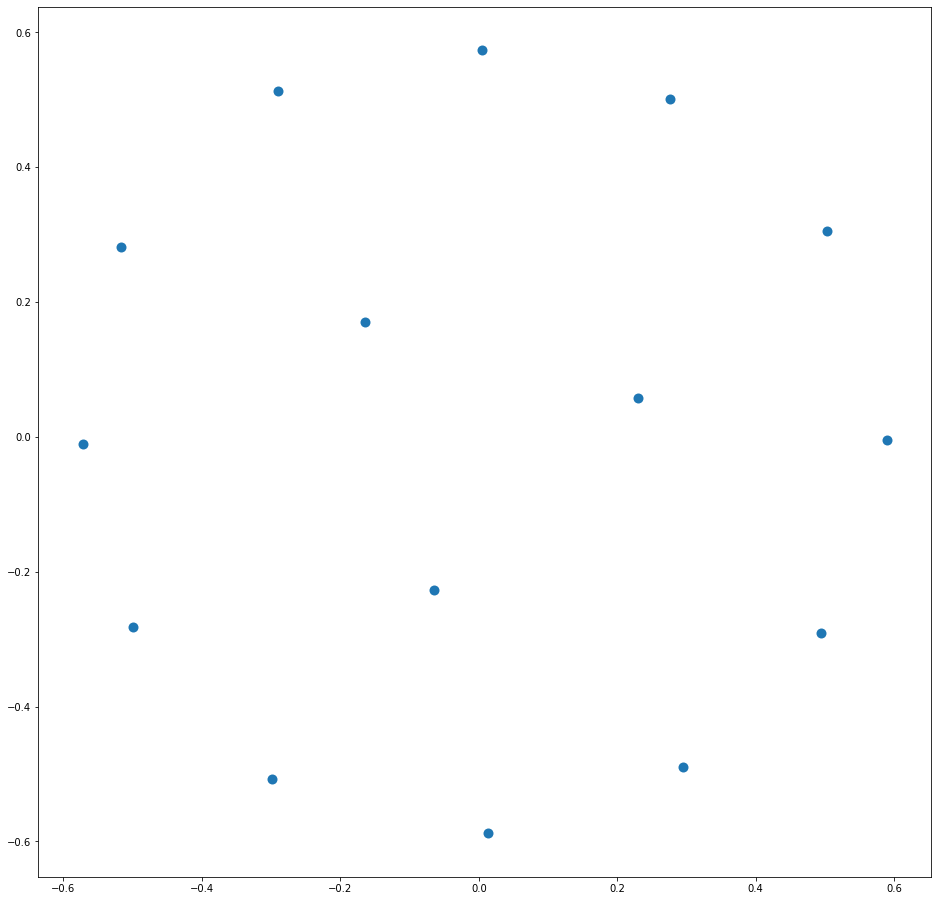

In [14]:
num_topics = 15
visualize_topics(beta, dictionary, num_topics, top_n_show=10)

In [14]:
def eval_model(topic_distributions, doc_topic_matrix, dictionary, train_docs,
               num_topics, top_n_show=10, m_most=1, top_n_coherence=10, top_n_diversity=25):

    # Metrics

    ## Qualitative Metrics

    ### Top-n words per topic
    for topic_id in range(num_topics):
        top_n_words, top_n_freqs = extract_top_n_words(topic_distributions, dictionary, topic_id, top_n_show)

        plt.figure(figsize=(10, 4))
        plt.title('Topic number ' + str(topic_id))
        plt.bar(top_n_words, top_n_freqs)
        plt.show()

    ### Topic sizes
    #

    ### Topic distances
    distances = calculate_topic_distances(topic_distributions)
    plt.figure(figsize=(6, 6))
    plt.imshow(distances, cmap='Greys')
    plt.show()

    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(distances).embedding_
    plt.figure(figsize=(6, 6))
    plt.scatter(pos[:, 0], pos[:, 1], s=100, lw=0)
    plt.show()

    ### Most m representative documents
    for topic_id in range(num_topics):
        print('Topic number ', topic_id, show_most_m_represantative_docs(doc_topic_matrix, m_most, train_docs, topic_id))


    ## Quantitative Metrics

    ### Topic Coherence
    mean_tc = 0.
    for topic_id in range(num_topics):
        tc = topic_coherence(topic_distributions, dictionary, topic_id, top_n_coherence, train_docs, method='npmi')
        print('Topic number ', topic_id, 'tc:', tc)
        mean_tc += tc
    print('Topic coherence:', mean_tc / num_topics)

    ### Topic Diversity
    print('Topic diversity', topic_diversity(topic_distributions, dictionary, top_n_diversity))

    ### Predictive Quality
    #

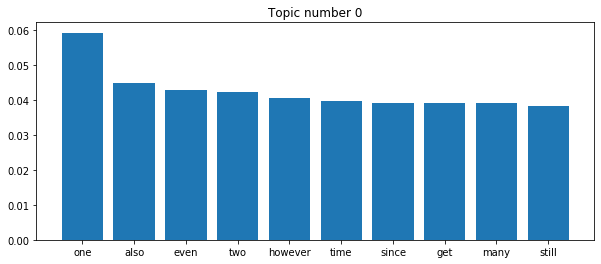

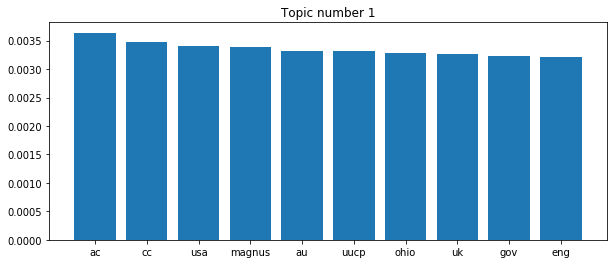

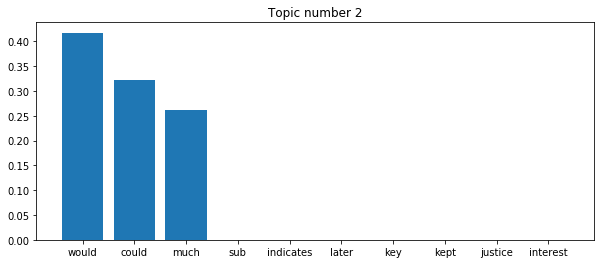

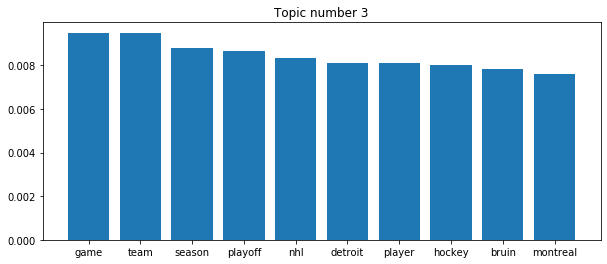

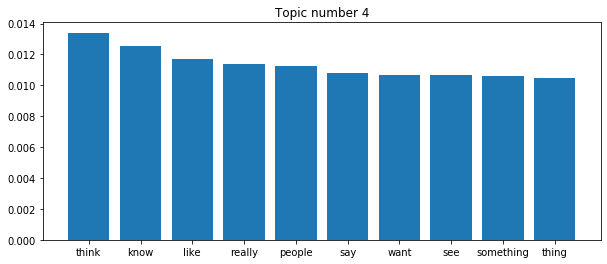

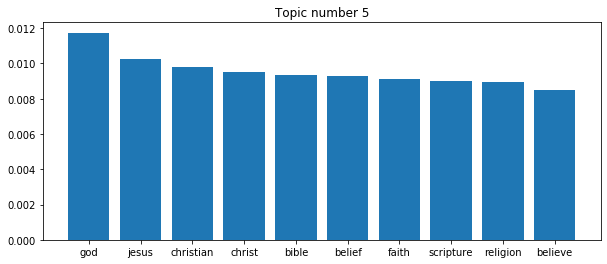

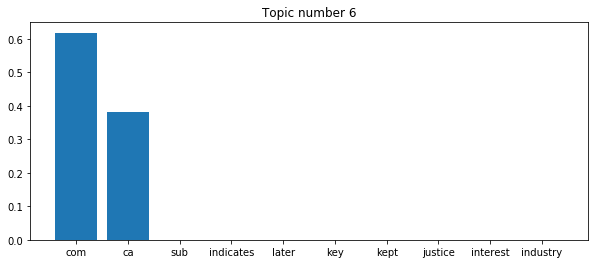

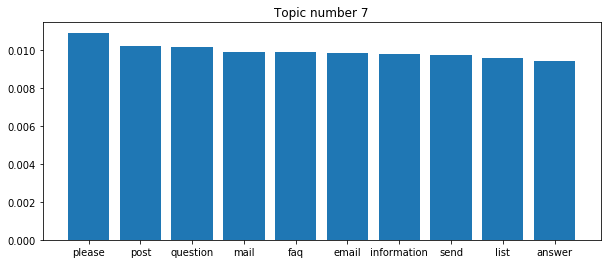

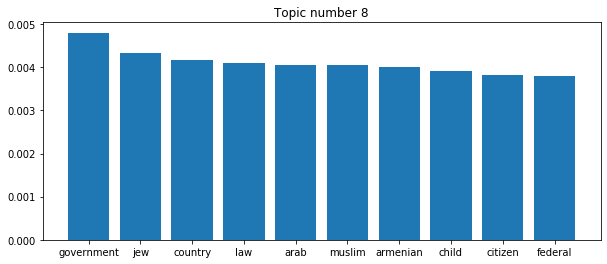

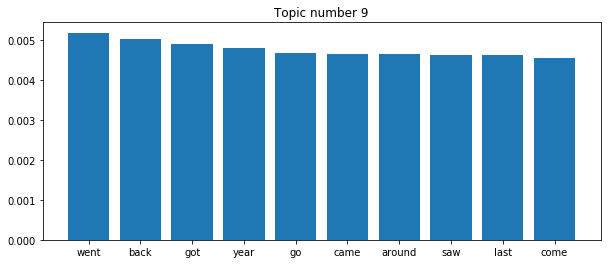

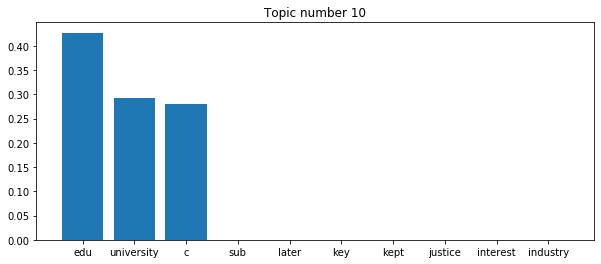

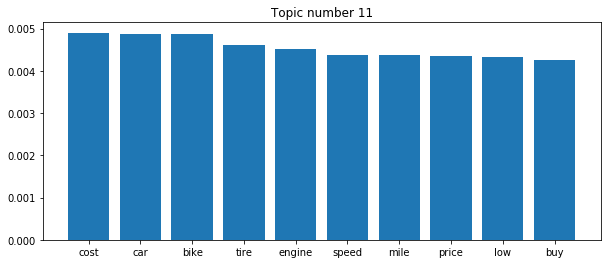

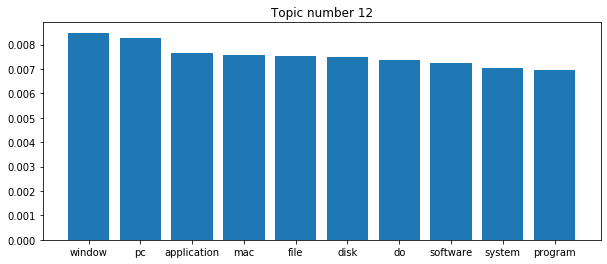

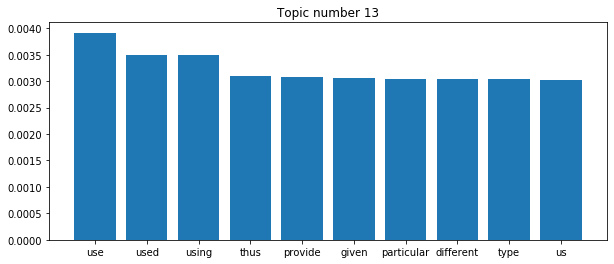

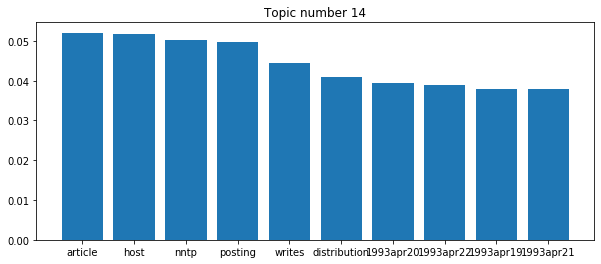

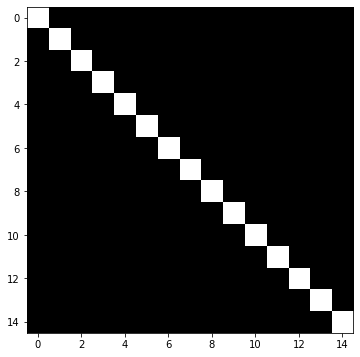

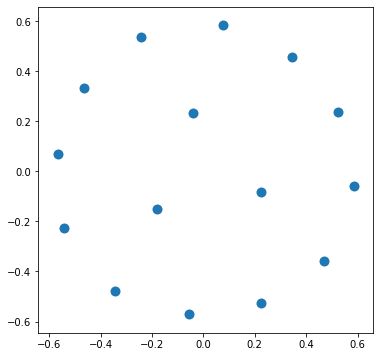

Topic number  0 ['tek com chuck daily verse group ca one another love one another roman']
Topic number  1 ['roman edu reply edu distribution usa university south part max max max max max max max max tm max max max max max max max max max max max max max max max max max max max max max max max max max tm max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max mi max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max tm max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max max m

Topic number  0 tc: 0.29628098523354285
Topic number  1 tc: 0.16576897437637894
Topic number  2 tc: 0.19837419125321365
Topic number  3 tc: 0.3432591815453142
Topic number  4 tc: 0.3063196300547785
Topic number  5 tc: 0.31475017862140153
Topic number  6 tc: 0.17396225432900184
Topic number  7 tc: 0.28024440241988385
Topic number  8 tc: 0.23733886031577495
Topic number  9 tc: 0.26388418147446363
Topic number  10 tc: 0.18363438219074388
Topic number  11 tc: 0.20035842030744938
Topic number  12 tc: 0.44404081484294317
Topic number  13 tc: 0.24095189486128715
Topic number  14 tc: 0.1721244966358452
Topic coherence: 0.2547528565641348
Topic diversity 0.8826666666666667


In [15]:
eval_model(beta, theta, dictionary, train_docs, num_topics, 
           top_n_show=10, m_most=1, top_n_coherence=10, top_n_diversity=25)